# Skimage

In [32]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from skimage import data
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
from skimage.color import rgb2hed

from skimage import exposure
from skimage.exposure import match_histograms


In [19]:
original = data.astronaut()
grayscale = rgb2gray(original)

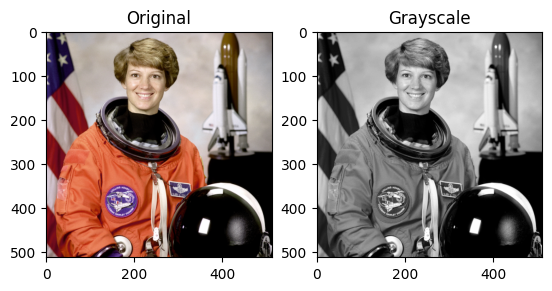

In [20]:
plt.subplot(121)
plt.imshow(original)
plt.title("Original")

plt.subplot(122)
plt.imshow(grayscale, cmap=plt.cm.gray)
plt.title("Grayscale")

plt.show()

In [21]:
rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

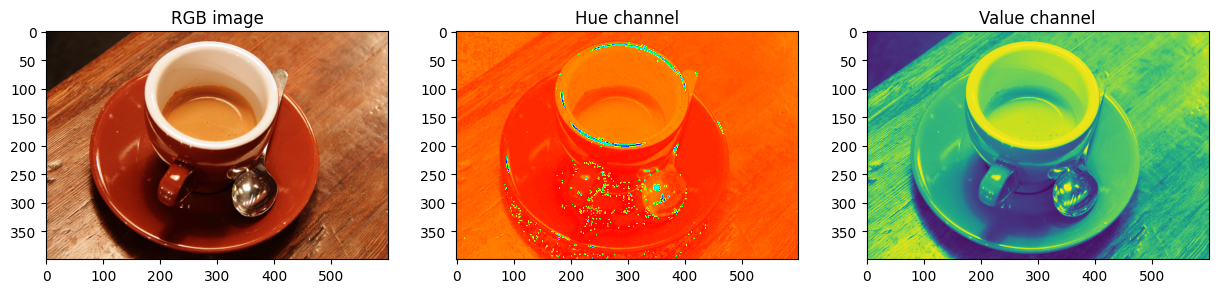

In [22]:
plt.figure(figsize=(15, 10))

plt.subplot(131)
plt.imshow(rgb_img)
plt.title("RGB image")

plt.subplot(132)
plt.imshow(hue_img, cmap='hsv')
plt.title("Hue channel")

plt.subplot(133)
plt.imshow(value_img)
plt.title("Value channel")

plt.show()

Можно поставить трешхолд на цветовой тон и выделить предмет на изображении

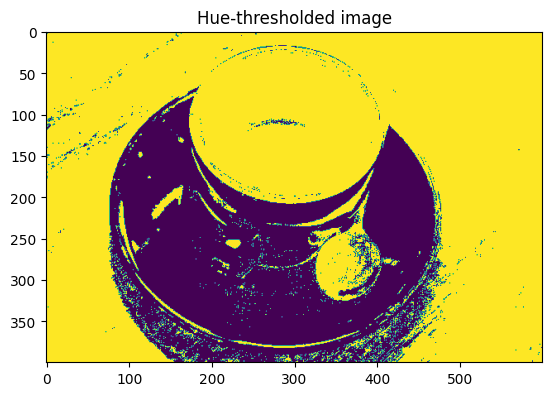

In [23]:
hue_threshold = 0.04
binary_img = hue_img > hue_threshold

plt.imshow(binary_img)
plt.title("Hue-thresholded image")

plt.show()

In [24]:
reference = data.coffee()
image = data.chelsea()

matched = match_histograms(image, reference, channel_axis=-1)

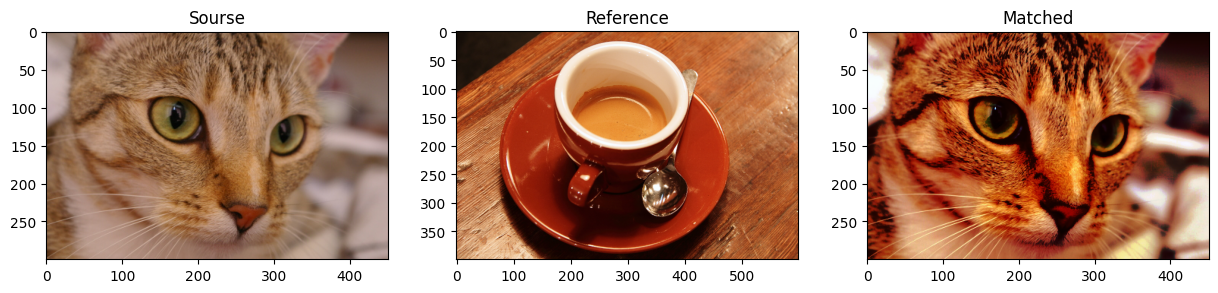

In [25]:
plt.figure(figsize=(15, 10))

plt.subplot(131)
plt.imshow(image)
plt.title("Sourse")

plt.subplot(132)
plt.imshow(reference)
plt.title("Reference")

plt.subplot(133)
plt.imshow(matched)
plt.title("Matched")

plt.show()

Create an artificial color close to the original one

In [26]:
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white', 'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet', 'white'])

In [27]:
ihc_rgb = data.immunohistochemistry()
ihc_hed = rgb2hed(ihc_rgb)

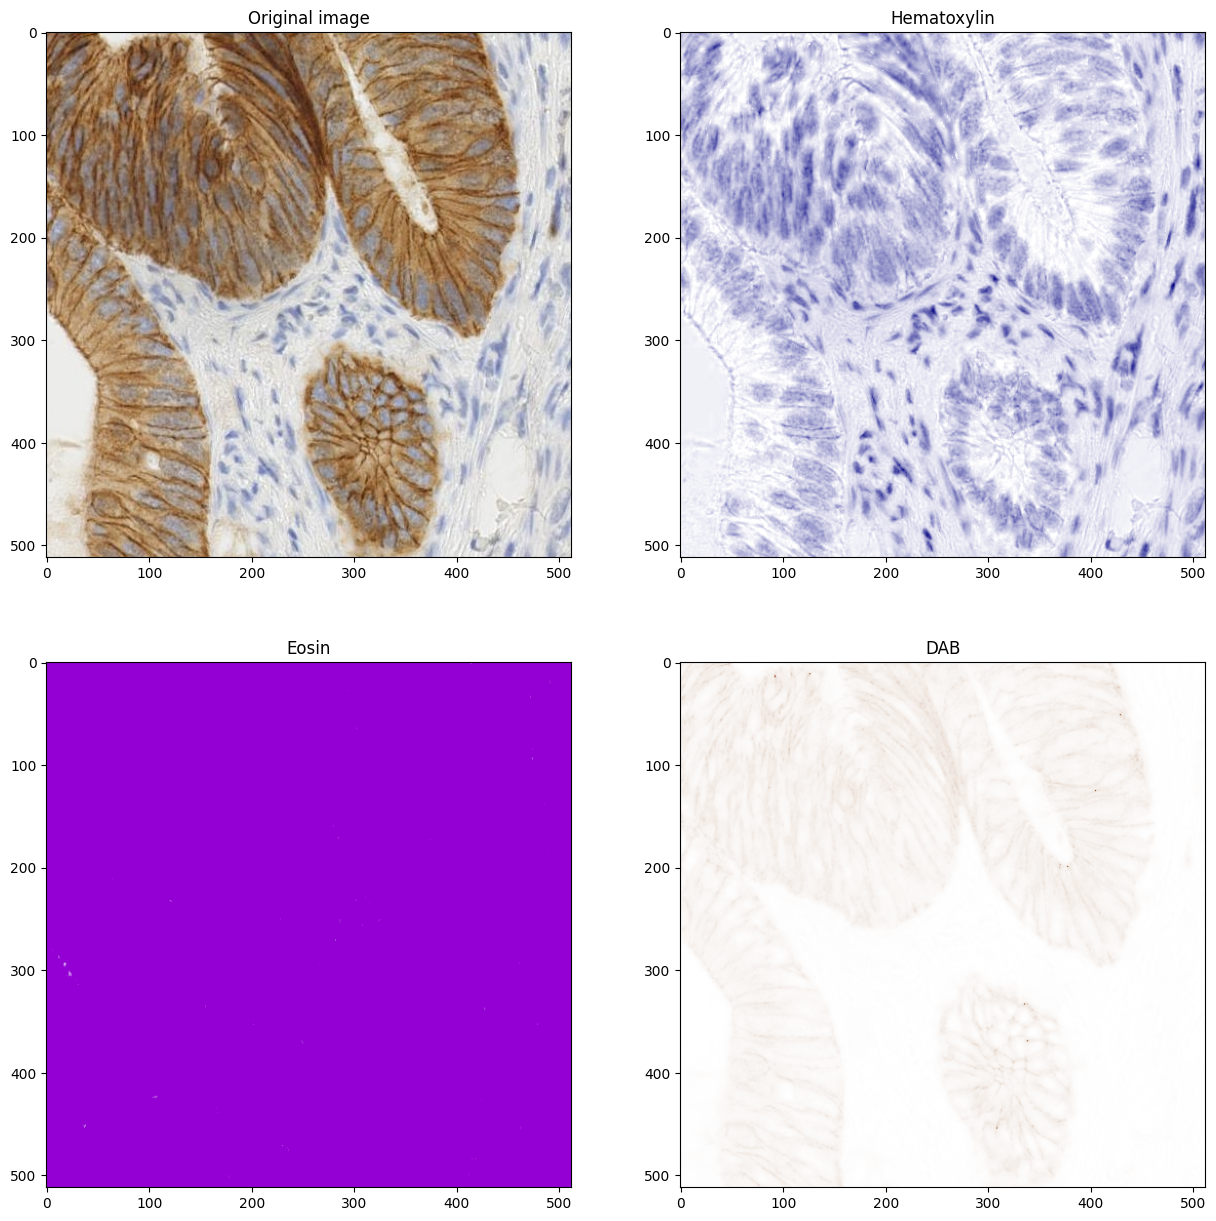

In [28]:
plt.figure(figsize=(15, 15))

plt.subplot(221)
plt.imshow(ihc_rgb)
plt.title("Original image")

plt.subplot(222)
plt.imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
plt.title("Hematoxylin")

plt.subplot(223)
plt.imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
plt.title("Eosin")

plt.subplot(224)
plt.imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
plt.title("DAB")

plt.show()

Улучшить контрастность

In [30]:
matplotlib.rcParams['font.size'] = 8

In [33]:
img = data.moon()

Contrast stretching

In [34]:
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

Equalizatuion

In [ ]:
img_eq = ex